In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as cns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing Data

In [2]:
dataToRead = pd.read_csv("Churn_Modelling.csv");

In [3]:
dataToRead

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataToRead.drop(["Surname"], axis=1,inplace=True);

In [5]:
dataToRead

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataToRead.drop(["CustomerId", "RowNumber"], axis=1, inplace=True)

In [7]:
dataToRead

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataToRead.drop_duplicates(inplace=True);

Filling NA Values

In [10]:
dataToRead["Balance"].fillna(dataToRead["Balance"].mean(), inplace=True)

/tmp/ipykernel_8238/1118715878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataToRead["Balance"].fillna(dataToRead["Balance"].mean(), inplace=True)


In [11]:
dataToRead

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
dataToRead.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [13]:
dataToRead.dropna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
dataToRead["Balance"].apply(lambda x: dataToRead["Balance"].mean() if x == 0 else x)

0        76485.889288
1        83807.860000
2       159660.800000
3        76485.889288
4       125510.820000
            ...      
9995     76485.889288
9996     57369.610000
9997     76485.889288
9998     75075.310000
9999    130142.790000
Name: Balance, Length: 10000, dtype: float64

In [16]:
dataToRead["Balance"] = dataToRead["Balance"].apply(lambda x: dataToRead["Balance"].mean() if x == 0 else x)

In [17]:
dataToRead

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


Encoding Labels

In [20]:
le = LabelEncoder()

In [22]:
dataToRead[["Geography"]] = dataToRead[["Geography"]].apply(le.fit_transform)

In [23]:
dataToRead

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,0,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.310000,2,1,0,92888.52,1


<BarContainer object of 10000 artists>

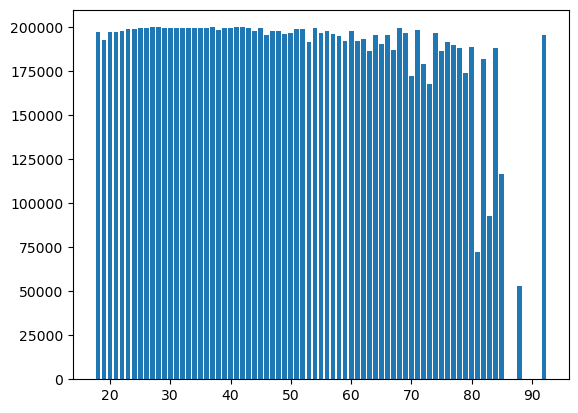

In [30]:
plt.bar(dataToRead["Age"], dataToRead["EstimatedSalary"])

<BarContainer object of 10000 artists>

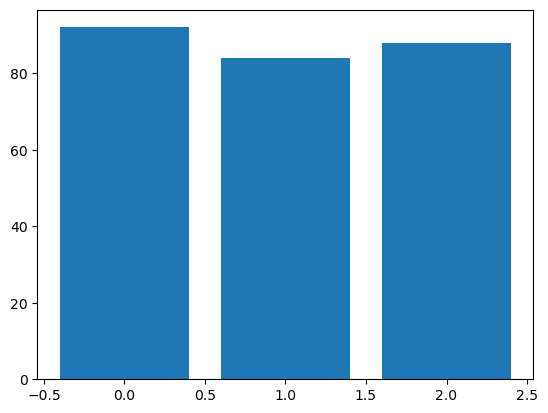

In [33]:
plt.bar(dataToRead["Geography"], dataToRead["Age"])

Can't Understand how to display again so I need some real revision on this